# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

   Para leer los archivos debo llamar a la librería pandas junto con read_csv porque todos son archivos tipo csv, a cada uno de los DataFrame asignarle un nombre diferente.

In [1]:
# importar librerías
import pandas as pd #llamar a Pandas y darle alias pd
import matplotlib.pyplot as plt #llamar a matplotlib y darle alias plt

In [2]:
# leer conjuntos de datos en los DataFrames
df_instacart = pd.read_csv('/datasets/instacart_orders.csv',delimiter=';') #leo el dataset de instacart
df_products = pd.read_csv('/datasets/products.csv',delimiter=';') #leo el dataset de products
df_aisles = pd.read_csv('/datasets/aisles.csv',delimiter=';') #leo el dataset de aisles
df_departments = pd.read_csv('/datasets/departments.csv',delimiter=';') #leo el dataset de departaments
df_order_products = pd.read_csv('/datasets/order_products.csv',delimiter=';') #leo el dataset de products

In [3]:
# mostrar información del DataFrame
df_instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Para este análisis hay cinco conjuntos de datos, todos estos objetos son DataFrames de panda. Cada uno de ellos tiene un número de filas determinado con una sola columna. 
1. df_instacart tiene 478967 filas
2. df_products tiene 49694 filas
3. df_aisles tiene 134 filas
4. df_departments tiene 21 filas
5. df_order_products tiene 4545007 filas

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

1. Verificar Tipos de Datos: Utilizar dtypes y corregir según sea necesario y convertir columnas de ID a int.
2. Validar los Valores Ausentes: Identificar valores faltantes, decidir cómo manejarlos (imputación, eliminación) y realizar esas acciones.
4. Identificar y Eliminar Duplicados: Contar duplicados df.duplicated().sum() y eliminar los duplicados con df.drop_duplicates()

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
duplicates = df_instacart.duplicated().sum()
print(f'Número de pedidos duplicados: {duplicates}')

duplicados = df_instacart[df_instacart.duplicated(keep=False)]
print("Líneas duplicadas:\n", duplicados.head())


Número de pedidos duplicados: 15
Líneas duplicadas:
         order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   

        days_since_prior_order  
30371                     16.0  
99462                      2.0  
119251                    18.0  
142258                     7.0  
145574                     2.0  


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? Tomé una muestra usando el método head , de los resultados obtenidos los duplicados tienen en común que la orden se realizó el mismo día de la semana el día miércoles a la misma hora del día.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

print(df_instacart.columns)


pedidos_2am_miercoles = df_instacart[(df_instacart['order_dow'] == 3) & (df_instacart['order_hour_of_day'] == 2)]

print(pedidos_2am_miercoles)
print()
print(f"Pedidos el miércoles a las 2:00 a.m.: {len(pedidos_2am_miercoles)}")


Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3           

¿Qué sugiere este resultado? Que las personas de este conjunto de datos realizan más número de pedidos el día miércoles a las dos de la mañana, por ende son los valores más duplicados en el DataFrame df_instacart.

In [10]:
# Elimina los pedidos duplicados
df_instacart.drop_duplicates(inplace=True)


In [11]:
# Vuelve a verificar si hay filas duplicadas
duplicates = df_instacart.duplicated().sum()
print(f'Número de pedidos duplicados tras eliminar duplicados: {duplicates}')

Número de pedidos duplicados tras eliminar duplicados: 0


In [12]:
# Vuelve a verificar si hay IDs duplicados de pedidos
id_duplicadas = df_instacart['order_id'].duplicated().sum()
print(f'Número de IDs de pedidos duplicados: {id_duplicadas}')

Número de IDs de pedidos duplicados: 0


Eliminé los duplicados de df_instacart con drop_duplicates, utilizando inplace=True para que se agregue al mismo DataFrame, luego se verifico si habían filas duplicadas, añadiendo el método sum() para que se puedan contabilizar. Finalmente una validación extra fue la revisar los pedidos por id, porque cada uno de ellos pertenece a un único pedido,de igual forma se añadio sum() a duplicated(). Según los resultados obtenidos de los 15 pedidos duplicados que habían anteriormente, ahora ya no hay ninguno en el DataFrame df_instacart que corresponde a los pedidos en la aplicación de Instacart.
Los duplicados pueden estar presentes debido a entradas de datos erróneas o repetitivas, en este caso una persona pudo hacer el mismo pedido varias veces o varias personas pudieron realizar el mismo pedido.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
duplicates = df_products.duplicated().sum()
print(f'Número de filas duplicadas: {duplicates}')

Número de filas duplicadas: 0


In [14]:
# Verifica si hay IDs duplicadas de productos
id_duplicados_productos = df_products['product_id'].duplicated().sum()
print(f'Número de IDs de productos duplicados: {id_duplicados_productos}')

Número de IDs de productos duplicados: 0


In [15]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)


# Encontrar nombres de productos duplicados (en mayúsculas)

nombres_productos_duplicados = df_products['product_name'].str.upper().duplicated(keep=False).sum()

# Mostrar el número de duplicados
print(f'Número de nombres de productos duplicados: {nombres_productos_duplicados}')

# Mostrar los nombres duplicados
print(df_products['product_name'])


Número de nombres de productos duplicados: 1465
0                               Chocolate Sandwich Cookies
1                                         All-Seasons Salt
2                     Robust Golden Unsweetened Oolong Tea
3        Smart Ones Classic Favorites Mini Rigatoni Wit...
4                                Green Chile Anytime Sauce
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes

nombres_productos_duplicados_no_faltantes = df_products['product_name'].str.upper().dropna().duplicated(keep=False).sum()
print(f'Número de nombres de productos duplicados (no faltantes): {nombres_productos_duplicados_no_faltantes}')

Número de nombres de productos duplicados (no faltantes): 207


Describe brevemente tus hallazgos y lo que hiciste con ellos.  No se encontraron filas completamente duplicadas en el dataframe products, lo que indica que cada fila contiene información única, cada producto tiene un identificador único, encontramos duplicados en nombres de productos, con 1465 casos si se ignoran las mayúsculas. Entre los productos no faltantes, hay 207 duplicados. Esto podría deberse a productos similares que difieren solo en pequeños detalles.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
duplicates = df_departments.duplicated().sum()
print(f'Número de filas duplicadas: {duplicates}')

Número de filas duplicadas: 0


In [18]:
# Revisa si hay IDs duplicadas de productos
id_duplicados = df_departments['department_id'].duplicated().sum()
print(f'Número de IDs de productos duplicados: {id_duplicados}')

Número de IDs de productos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.En este caso no hay ni filas ni IDs de departamento duplicados, indica que cada entrada de departamento en el dataframe es única tanto en su combinación de datos como en su identificador.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
duplicates = df_aisles.duplicated().sum()
print(f'Número de filas duplicadas: {duplicates}')

Número de filas duplicadas: 0


In [20]:
# Revisa si hay IDs duplicadas de productos
id_duplicados = df_aisles['aisle_id'].duplicated().sum()
print(f'Número de IDs de pasillos duplicados: {id_duplicados}')

Número de IDs de pasillos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.En este caso no hay ni filas ni IDs de departamento duplicados, indica que cada entrada de departamento en el dataframe es única tanto en su combinación de datos como en su identificador.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
duplicates = df_order_products.duplicated().sum()
print(f'Número de filas duplicadas: {duplicates}')

Número de filas duplicadas: 0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
id_duplicados = df_order_products['order_id'].duplicated().sum()
print(f'Número de IDs de ordenes duplicados: {id_duplicados}')

Número de IDs de ordenes duplicados: 4094961


No hay filas totalmente duplicadas en el DataFrame df_order_products. Esto indica que cada fila en este caso representa un pedido único o al menos contiene algún detalle único en sus datos, pero confirmando con order_id hay 4094961 IDs de ordenes duplicadas porque muchas filas comparten el mismo order_id, hay que tomar en cuenta que una orden puede tener varios productos, se uso el método duplicated() junto con sum() para verificar los duplicados en ambos casos. 


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
valores_ausentes_product_name = df_products['product_name'].isna().sum()
print(f'Número de valores ausentes en "product_name": {valores_ausentes_product_name}')


Número de valores ausentes en "product_name": 1258


Los resultados indican el número total de valores ausentes en la columna product_name, que es un antecedente para poder realizar limpieza de datos posteriormente.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
relacion_aisle = df_products[df_products['product_name'].isna()]['aisle_id'] == 100
print(f'¿Todos los productos ausentes están en aisle_id 100? {relacion_aisle.all()}')


¿Todos los productos ausentes están en aisle_id 100? True


Todos los valores ausentes en product_name están en el pasillo (aisle_id) 100. Se utilizó .all() para verificar si todos los valores de esta condición son verdaderos o falsos, resulto en True.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
relacion_department = df_products[df_products['product_name'].isna()]['department_id'] == 21
print(f'¿Todos los productos ausentes están en department_id 21? {relacion_department.all()}')

¿Todos los productos ausentes están en department_id 21? True


Todos los valores ausentes en product_name están en el departamento(department_id) 21. Se utilizó .all() para verificar si todos los valores de esta condición son verdaderos o falsos, resulto en True.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

aisle_info = df_aisles[df_aisles['aisle_id'] == 100]
department_info = df_departments[df_departments['department_id'] == 21]
print("Información del pasillo con ID 100:\n", aisle_info)
print("Información del departamento con ID 21:\n", department_info)

Información del pasillo con ID 100:
     aisle_id    aisle
99       100  missing
Información del departamento con ID 21:
     department_id department
20             21    missing


Con esta información, entendemos mejor el contexto de los productos relacionados con estos IDs,puede ser útil para explicar por qué algunos productos pueden no tener nombre.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)

#Para verificar si se completaron los datos con 'Unknown'
unknown_products = df_products[df_products['product_name'] == 'Unknown']

# Muestra las primeras 5 filas
print(unknown_products.head())

     product_id product_name  aisle_id  department_id
37           38      Unknown       100             21
71           72      Unknown       100             21
109         110      Unknown       100             21
296         297      Unknown       100             21
416         417      Unknown       100             21


Se identificó y completó los valores ausentes en product_name, hubo relación con aisle_id 100 y department_id 21. Llené los valores ausentes con "Unknown" para asegurar que el DataFrame esté limpio y consistente, también verifique alfunas columnas con head(). 

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
valores_ausentes_orders = df_instacart.isna().sum()
print(f'Número de valores ausentes en "orders":\n{valores_ausentes_orders}')

Número de valores ausentes en "orders":
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

# Filtrar las filas donde 'days_since_prior_order' es nulo
missing_days_orders = df_instacart[df_instacart['days_since_prior_order'].isna()]

# Verificar si todos los valores ausentes corresponden al primer pedido
is_first_order_missing = (missing_days_orders['order_number'] == 1).all()
print("¿Todos los valores ausentes corresponden al primer pedido?", is_first_order_missing)



¿Todos los valores ausentes corresponden al primer pedido? True


Todos los valores asusentes corresponden al primer pedido, days_since_prior_order corresponden efectivamente al primer pedido de cada cliente, por lo cual tiene sentido que no tengan un valor en esta columna.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
valores_ausentes_product_name = df_order_products.isna().sum()
print(f'Número de valores ausentes : {valores_ausentes_product_name}')

Número de valores ausentes : order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(f"Valor mínimo en 'add_to_cart_order': {df_order_products['add_to_cart_order'].min()}, Valor máximo en 'add_to_cart_order': {df_order_products['add_to_cart_order'].max()}")



Valor mínimo en 'add_to_cart_order': 1.0, Valor máximo en 'add_to_cart_order': 64.0


Describe brevemente cuáles son tus hallazgos. 
El valor mínimo es 1,algunos productos fueron los primeros en ser añadidos al carrito, y el máximo es 64, indicando que el mayor número de productos en un solo pedido es 64. Esto es importante porque nos dice hasta qué cantidad puede llegar la columna add_to_cart_order.


In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

# Obtiene todas las IDs de pedidos con valores ausentes en 'add_to_cart_order'
order_ids_valores_ausentes = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()



In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


# Agrupar los pedidos con datos ausentes y cuenta el número de productos en cada pedido
productos_por_pedido = df_order_products[df_order_products['order_id'].isin(order_ids_valores_ausentes)].groupby('order_id')['product_id'].count()

# Obtiene el valor mínimo en el conteo de productos por pedido
min_producto_conteo = productos_por_pedido.min()
print(f"¿Todos los pedidos con valores ausentes tienen más de 64 productos? {'Sí' if min_producto_conteo > 64 else 'No'}")
#Verifico que los IDs sean int.
print(df_order_products.dtypes)

¿Todos los pedidos con valores ausentes tienen más de 64 productos? Sí
order_id               int64
product_id             int64
add_to_cart_order    float64
reordered              int64
dtype: object


Describe brevemente cuáles son tus hallazgos. Este código mostrará si todos los pedidos con valores ausentes en add_to_cart_order contienen más de 64 productos.
1. Filtrar pedidos con valores ausentes: Extraemos solo las filas donde add_to_cart_order es nulo.
2. Agrupar y contar: Agrupamos estos pedidos por order_id y contamos la cantidad de product_id en cada grupo.
3. Mínimo conteo: Obtenemos el mínimo número de productos en estos pedidos para ver si cumple la condición de tener más de 64 productos.
4. Verificación: Confirmamos si todos los pedidos con valores ausentes tienen más de 64 productos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

# Reemplaza los valores NaN por 999 y convierte la columna a tipo entero
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)

# Verifica los primeros 20 registros
print(df_order_products[['order_id', 'add_to_cart_order']].head(20))

# Verifica si hay algún valor 999 en la columna 'add_to_cart_order'
print(f"¿Hay valores 999 en 'add_to_cart_order'? {df_order_products['add_to_cart_order'].eq(999).any()}")
 

    order_id  add_to_cart_order
0    2141543                 17
1     567889                  1
2    2261212                  1
3     491251                 35
4    2571142                  5
5    2456893                  4
6     644579                  5
7    2231852                 10
8    3185766                 14
9     420019                  4
10    925051                  2
11     44064                 28
12    522547                 10
13   2475670                  3
14   1961225                  1
15   2397389                 16
16    639939                  1
17   1721072                  8
18     89640                  7
19   2500729                  5
¿Hay valores 999 en 'add_to_cart_order'? True


Describe brevemente tus hallazgos y lo que hiciste con ellos. Rellenar los valores NaN de la columna add_to_cart_order con 999.Convertir la columna a tipo entero.Imprimir las primeras 20 filas para verificar.También imprime si efectivamente hay algún valor 999 en la columna add_to_cart_order.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Se verificó los tipos de datos  Tipos de Datos, confirmando que los IDs sean númericos. Se validó los valores ausentes se identificó los valores faltantes, detectecatdolos con el método isna(), se uso fillna() en algunos de ellos para reemplazar los valores asusentes por nuevos valores. Se identificó y eliminó los valores duplicados y se contó los  duplicados con df.duplicated().sum(). Los clientes realizan más ordenes los miercóles a las 2 am y confirmamos  que todos los pedidos con valores ausentes tienen más de 64 productos.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
# Verifica si los valores de 'order_hour_of_day' están fuera del rango 0-23
valores_invalidos_hora = df_instacart[(df_instacart['order_hour_of_day'] < 0) | (df_instacart['order_hour_of_day'] > 23)].shape[0]

# Verifica si los valores de 'order_dow' están fuera del rango 0-6
valores_invalidos_dia = df_instacart[(df_instacart['order_dow'] < 0) | (df_instacart['order_dow'] > 6)].shape[0]

In [36]:
print(f'Número de valores fuera del rango en "order_hour_of_day": {valores_invalidos_hora}')
print(f'Número de valores fuera del rango en "order_dow": {valores_invalidos_dia}')

Número de valores fuera del rango en "order_hour_of_day": 0
Número de valores fuera del rango en "order_dow": 0


En cuanto a rango de días y horas hubo los hallazgos siguientes:
-Horas: No hay valores fuera del rango de 0 a 23 para order_hour_of_day, indica que las horas de pedido son razonables y están correctamente registradas.
-Días: No hay valores fuera del rango de 0 a 6 para order_dow, indica que los días de la semana también están en el rango correcto.
Por ende, no es necesario hacer correcciones en estas columnas, los datos son válidos y están dentro de los límites razonables.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

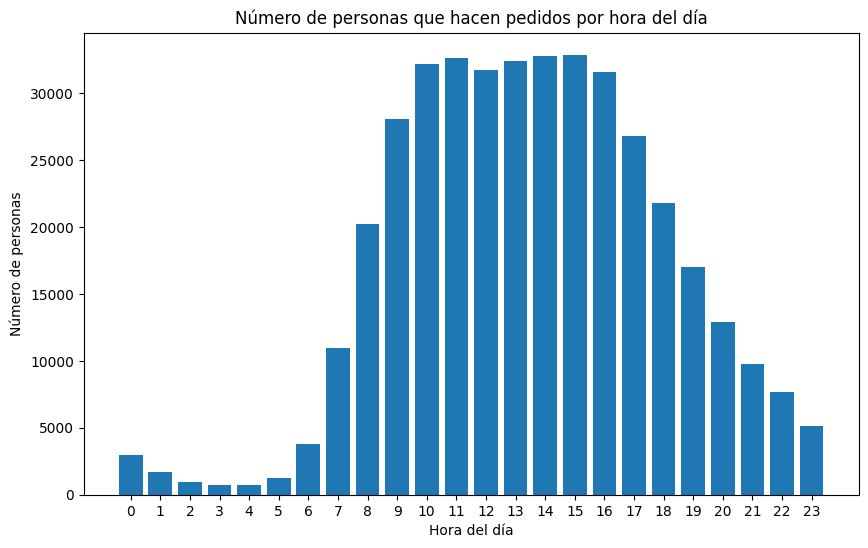

In [37]:
# Agrupar por 'order_hour_of_day' y contar el número de 'user_id' únicos para cada hora
personas_por_hora = df_instacart.groupby('order_hour_of_day')['user_id'].nunique().reset_index()


# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(personas_por_hora['order_hour_of_day'], personas_por_hora['user_id'])

# Añadimos título y etiquetas
plt.title('Número de personas que hacen pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de personas')

# Mostrar todas las horas en el eje X
plt.xticks(range(24))


# Mostramos el gráfico
plt.show()


El gráfico muestra que la mayoría de las personas realizan pedidos entre las 10:00 AM y las 8:00 PM, con un pico notable alrededor de las 12:00 PM (hora de almuerzo) y otro después del horario laboral, entre las 6:00 PM y las 8:00 PM. Esto sugiere que la mayor parte de las compras se realizan durante las horas de descanso y por la tarde, probablemente cuando las personas tienen más tiempo libre para realizar compras en línea. Las horas de la madrugada y la noche (de 12:00 AM a 6:00 AM) tienen una baja cantidad de personas haciendo pedidos.

### [A3] ¿Qué día de la semana compran víveres las personas?

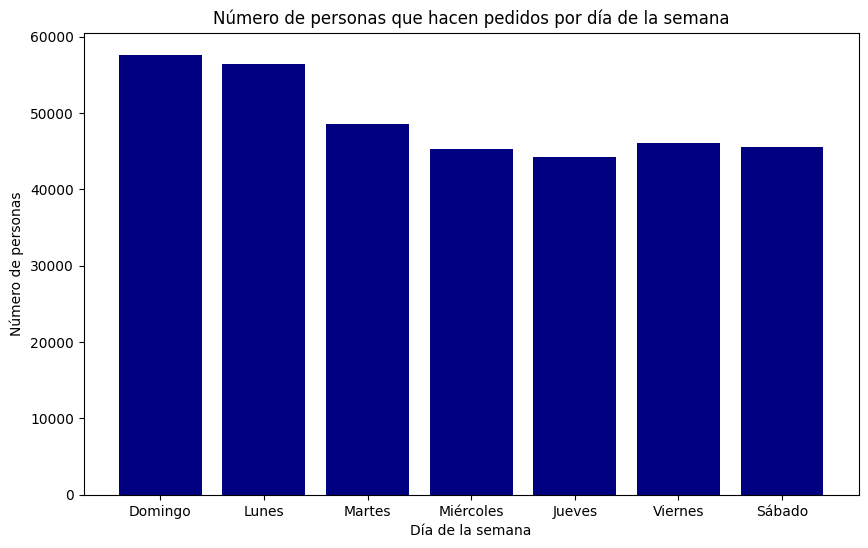

,Día,Día (Número),Número de Personas
0,Domingo,0,57661
1,Lunes,1,56479
2,Martes,2,48587
3,Miércoles,3,45331
4,Jueves,4,44281
5,Viernes,5,46127
6,Sábado,6,45604


In [38]:
# Lista de nombres de días de la semana (0 = Domingo, 6 = Sábado)
dias_semana = ["Domingo", "Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado"]

# Agrupamos por 'order_dow' y contamos los 'user_id' únicos para cada día de la semana
personas_por_dia = df_instacart.groupby('order_dow')['user_id'].nunique().reset_index()

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(personas_por_dia['order_dow'], personas_por_dia['user_id'], color="navy")

# Añadimos título y etiquetas
plt.title('Número de personas que hacen pedidos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de personas')

# Cambiar los valores del eje X a los nombres de los días
plt.xticks(ticks=range(7), labels=dias_semana)

# Mostramos el gráfico
plt.show()

personas_por_dia.assign(Día=lambda x: [dias_semana[i] for i in x['order_dow']]).rename(columns={'order_dow': 'Día (Número)', 'user_id': 'Número de Personas'}).loc[:, ['Día', 'Día (Número)', 'Número de Personas']]




El día que las personas realizan más pedidos es el domingo con 57661 ordenes, seguido por el día lunes con 56479 y el día con menos pedidos es el sábado con 45604 pedidos, se puede constatar esta información en el gráfico como en la tabla de valores. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

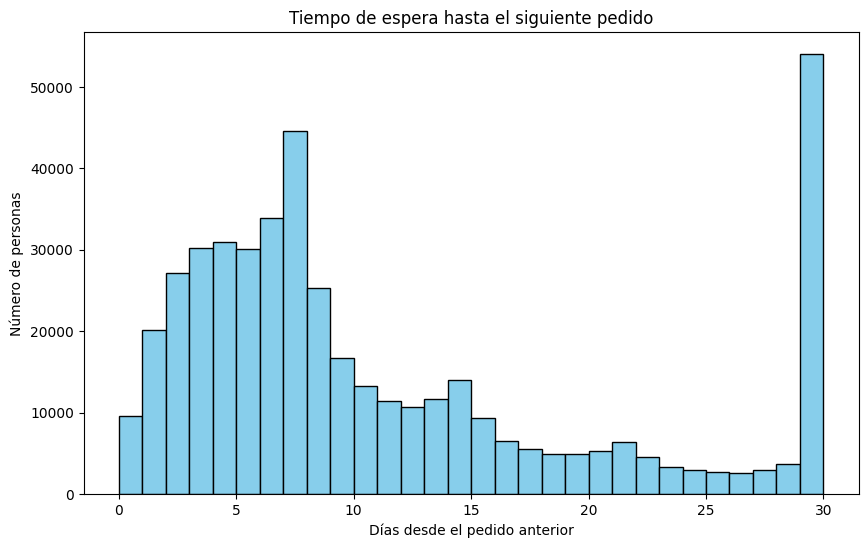

In [39]:
# Crear el histograma del tiempo de espera entre pedidos
plt.figure(figsize=(10, 6))
plt.hist(df_instacart['days_since_prior_order'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Tiempo de espera hasta el siguiente pedido')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Número de personas')
plt.show()


Según los resultados las personas pueden tardar hasta 30 días en realizar su próximo pedido ya que es la barra más alta, pero lo que se repite con mayor frecuencia es que las personas esperan para realizar su próximo pedido de 6 a 8 días.Mínimo para realizar el próximo pedido corre desde el día 0 y máximo esperan hasta 30 días. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
# Filtrar los datos de miércoles.
wednesday_data = df_instacart[df_instacart['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()


In [41]:
# Filtrar los datos de sábado.
saturday_data = df_instacart[df_instacart['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

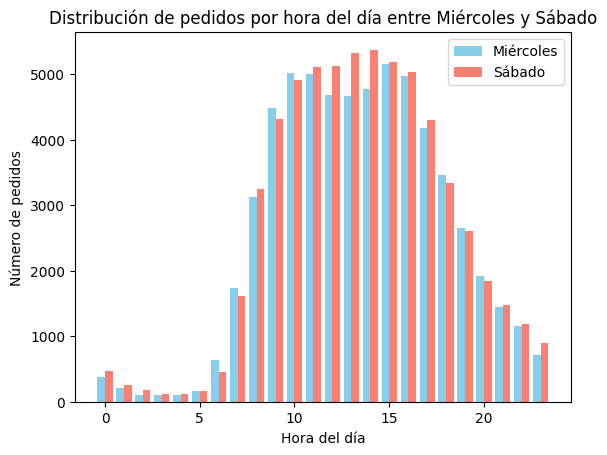

In [42]:
# Crear gráfico
plt.bar(wednesday_data.index - 0.2, wednesday_data.values, width=0.4, label='Miércoles', color='skyblue')
plt.bar(saturday_data.index + 0.2, saturday_data.values, width=0.4, label='Sábado', color='salmon')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Distribución de pedidos por hora del día entre Miércoles y Sábado')
plt.legend()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Está muy bien la comparación de ambos días en general. De nuevo, la visualización es muy clara.
</div>


En el gráfico se puede concluir que ambos días presentan más pedidos entre las 10:00 y las 16:00. El miércoles muestra un pico de pedidos entre las 9:00 y las 11:00, así como otro pico entre las 16:00 y las 17:00. Por otro lado, el sábado registra la mayor cantidad de pedidos entre las 10:00 y las 14:00.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

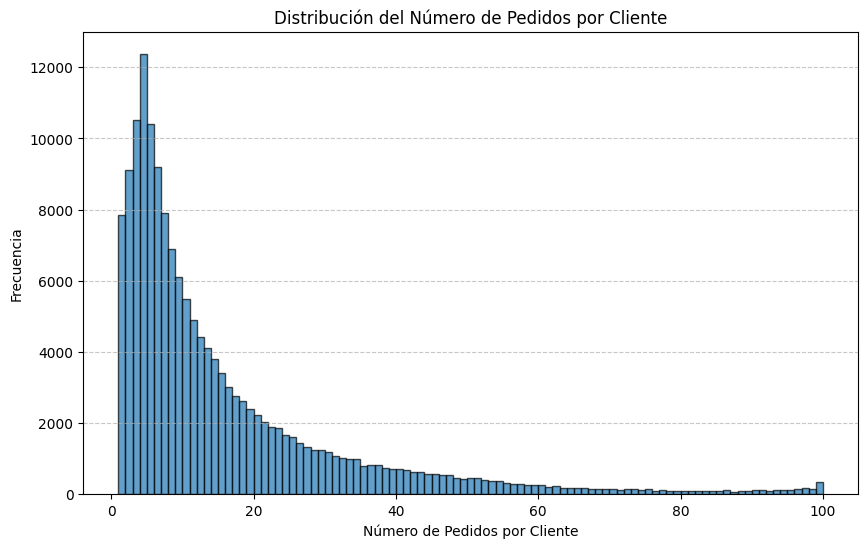

In [43]:
# Contamos el número de pedidos por cliente (usando 'user_id' y 'order_number')
pedidos_por_cliente = df_instacart.groupby('user_id')['order_number'].max()

# Graficamos la distribución de pedidos por cliente
plt.figure(figsize=(10, 6))
plt.hist(pedidos_por_cliente, bins=range(1, pedidos_por_cliente.max() + 1), edgecolor='black', alpha=0.7)
plt.xlabel('Número de Pedidos por Cliente')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Pedidos por Cliente')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


In [44]:
# Estadísticas descriptivas
print(pedidos_por_cliente.describe())

count    157437.000000
mean         15.577571
std          17.215517
min           1.000000
25%           4.000000
50%           9.000000
75%          20.000000
max         100.000000
Name: order_number, dtype: float64


La mayoría de los clientes realizan entre 1 y 10 pedidos, según la visualización. El promedio de pedidos realizados por los clientes es de 15.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
productos_populares = df_products.groupby('product_id').size().reset_index(name='count')

# Ordenamos por la cantidad de pedidos en orden descendente
productos_populares = productos_populares.sort_values(by='count', ascending=False)


In [46]:
# Obtenemos los 20 productos más populares
top_20_productos = productos_populares.head(20)

# Unimos con el archivo de productos para obtener los nombres de los productos
top_20_productos = top_20_productos.merge(df_products[['product_id', 'product_name']], on='product_id')

In [47]:
# Mostramos los resultados
print(top_20_productos[['product_id', 'product_name', 'count']])

    product_id                                      product_name  count
0            1                        Chocolate Sandwich Cookies      1
1        33146                              Revolt Killer Citrus      1
2        33124  Healthy Kids Organic Chocolate Nutritional Shake      1
3        33125              Organic Mini Cheddar Cheese Crackers      1
4        33126                                  Sesame Flatbread      1
5        33127                        No Salt Roasted Pistachios      1
6        33128                         Riccardo Balsamic Vinegar      1
7        33129                                    Classic Hummus      1
8        33130      Organic Salt Free Cabbage Dill Raw Sauerkrat      1
9        33131                        Hair Remover Wax Strip Kit      1
10       33132                               Mild Red Taco Sauce      1
11       33133          Rising Crust Spicy Italian Sausage Pizza      1
12       33134                      Orange Recovery Energy Drink

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Ten cuidado con el count, si son los top20, el count debería ser mucho mayor a 1.
</div>


Utilice el método sort para ordenar los valores el producto estrella es el Chocolate Sandwich Cookies y el que se vende menos es Stir Fry Sauce.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
articulos_por_pedido = df_order_products.groupby('order_id').size()


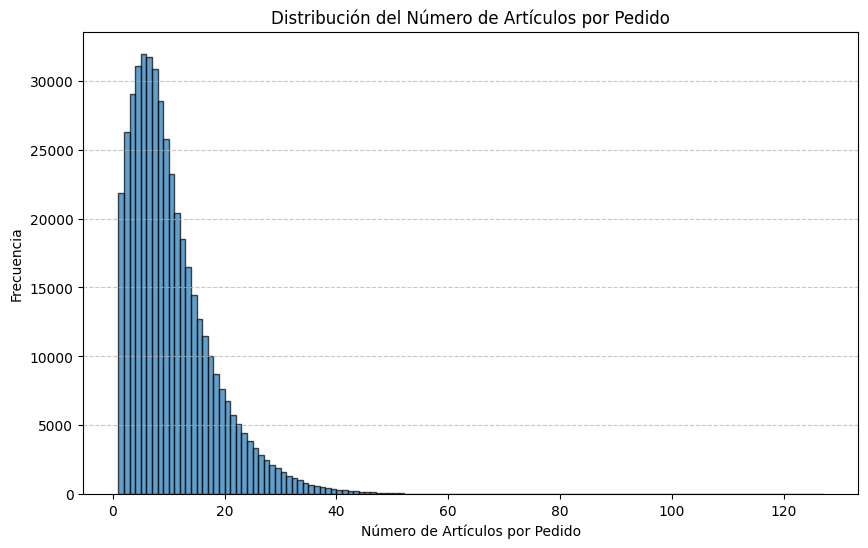

In [49]:
# Visualizar la distribución de artículos por pedido
plt.figure(figsize=(10, 6))
plt.hist(articulos_por_pedido, bins=range(1, articulos_por_pedido.max() + 1), edgecolor='black', alpha=0.7)
plt.xlabel('Número de Artículos por Pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Artículos por Pedido')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [50]:
print(articulos_por_pedido.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


Según el gráfico se observa claramente que la mayoría de personas realizan 10 pedidos, la distribución va en aumento hasta llegar aproximadamente a los 10 pedidos y en este punto empieza a decrecer, según los datos obtenidos, las personas en promedio realizan alrededor de 10 pedidos, lo que confirma lo que se observá en el gráfico. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
productos_reordenados = df_order_products[df_order_products['reordered'] == 1]


In [52]:
frecuencia_reordenados = productos_reordenados.groupby('product_id').size().reset_index(name='count')


In [53]:
frecuencia_reordenados = frecuencia_reordenados.sort_values(by='count', ascending=False)

# Obtener los 20 principales productos reordenados
top_20_reordenados = frecuencia_reordenados.head(20)

In [54]:
# Unir con el archivo de productos para obtener los nombres
top_20_reordenados = top_20_reordenados.merge(df_products[['product_id', 'product_name']], on='product_id')

# Mostrar los resultados
print(top_20_reordenados[['product_id', 'product_name', 'count']])

    product_id              product_name  count
0        24852                    Banana  55763
1        13176    Bag of Organic Bananas  44450
2        21137      Organic Strawberries  28639
3        21903      Organic Baby Spinach  26233
4        47209      Organic Hass Avocado  23629
5        47766           Organic Avocado  18743
6        27845        Organic Whole Milk  16251
7        47626               Large Lemon  15044
8        27966       Organic Raspberries  14748
9        16797              Strawberries  13945
10       26209                     Limes  13327
11       22935      Organic Yellow Onion  11145
12       24964            Organic Garlic  10411
13       45007          Organic Zucchini  10076
14       49683            Cucumber Kirby   9538
15       28204        Organic Fuji Apple   8989
16        8277  Apple Honeycrisp Organic   8836
17       39275       Organic Blueberries   8799
18        5876             Organic Lemon   8412
19       49235       Organic Half & Half

El producto más ordenado con una frecuencia mayor es la Banana,es así que lo reordenan 55763 veces y dentro de los 20 productos el que menos es reordenado nuevante es Organic Half & Half  con 8389 reordenes.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [55]:
total_pedidos = df_order_products.groupby('product_id').size()  # Total de pedidos por producto


In [56]:
reordenamientos = df_order_products[df_order_products['reordered'] == 1].groupby('product_id').size()  # Total de reordenamientos por producto

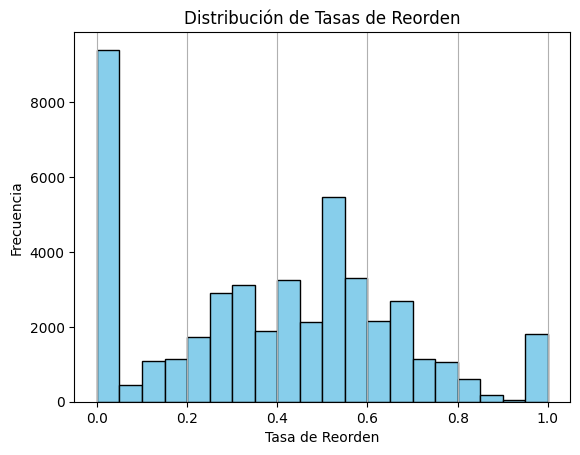

In [57]:
tasa_repeticion = (reordenamientos / total_pedidos).reset_index(name='reorder_rate').fillna(0)  # Tasa de repetición
tasa_repeticion

# seleccionar solo la columna 'reorder_rate' para el histograma
tasa_repeticion['reorder_rate'].hist(bins=20, color='skyblue', edgecolor='black')

# Personalización del gráfico
plt.title("Distribución de Tasas de Reorden")
plt.xlabel("Tasa de Reorden")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()




La tasa de reorden es bastante baja, si observamos el gráfico, los valores más contundentes estan más cerca del cero que del 1. 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [58]:
# Paso 1: Combinar `instacart_orders` y `order_products` usando 'order_id'
merged_data = pd.merge(
    df_instacart[['order_id', 'user_id']],  # Seleccionar columnas relevantes de instacart_orders
    df_order_products,  # Tabla con detalles de productos por pedido
    on='order_id'  # Clave de combinación
)

# Paso 2: Calcular el número total de productos pedidos por cliente
total_products_per_user = merged_data.groupby('user_id').size()

# Paso 3: Calcular el número de productos reordenados por cliente (reordered = 1)
reordered_products_per_user = merged_data[merged_data['reordered'] == 1].groupby('user_id').size()

# Paso 4: Calcular la proporción de productos reordenados
reorder_rate_per_user = (reordered_products_per_user / total_products_per_user).fillna(0).reset_index(name='reorder_rate')



   user_id  reorder_rate
0        2      0.038462
1        4      0.000000
2        5      0.666667
3        6      0.000000
4        7      0.928571


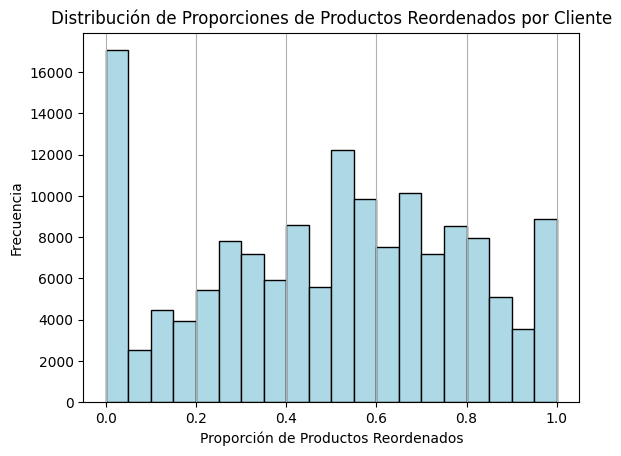

In [59]:
# Mostrar los primeros resultados
print(reorder_rate_per_user.head())

# Paso 5: Visualización de la distribución
reorder_rate_per_user['reorder_rate'].hist(bins=20, color='lightblue', edgecolor='black')

# Personalizar el gráfico
plt.title("Distribución de Proporciones de Productos Reordenados por Cliente")
plt.xlabel("Proporción de Productos Reordenados")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Acorde con los resultados:
user_id = 2: Este cliente ha reordenado el 3.8% de los productos que ha pedido.
user_id = 5: Este cliente ha reordenado el 6.6% de los productos que ha pedido.
user_id = 7: Este cliente ha reordenado el 92.9% de los productos que ha pedido.
User_id 7 es quien más reordenes de productos ha tenido, conforme a a la distribución como la mayoría esta cercana a 0 los clientes prefieren comprar nuevos productos, y en poca cantidad vuelven a reordenar productos que ya compraron como lo vemos en el gráfico que no hay tantos valores cercanos a 1 en el histograma. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [60]:
# Paso 1: Filtrar productos que fueron agregados primero
first_in_cart = df_order_products[df_order_products['add_to_cart_order'] == 1]


In [61]:
# Paso 2: Contar la frecuencia de cada producto
first_in_cart_counts = first_in_cart['product_id'].value_counts().reset_index()
first_in_cart_counts.columns = ['product_id', 'count']


In [62]:
# Paso 3: Obtener los nombres de los productos
top_20_products = pd.merge(
    first_in_cart_counts,
    df_products[['product_id', 'product_name']],
    on='product_id'
).sort_values(by='count', ascending=False).head(20)

# Mostrar los resultados ordenados
top_20_products

,product_id,count,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


De los 20 principales productos que las personas pone primero en su carrito son las Bananas, y de los 20 principales el que menos consumen y ponen menos en sus carritos son los Organic Yellow Onion.

### Conclusion general del proyecto:

El análisis de los datos de compras de los usuarios en Instacart revela patrones interesantes que pueden ser útiles tanto para optimizar las operaciones como para mejorar la experiencia del cliente.

Patrones de Compra por Hora: Los resultados muestran que la mayoría de los pedidos se realizan entre las 10:00 AM y las 8:00 PM, con picos notables alrededor de las 12:00 PM, durante la hora de almuerzo, y entre las 6:00 PM y las 8:00 PM, después del horario laboral. Esto sugiere que los usuarios prefieren hacer compras en línea durante sus horas de descanso, cuando tienen más tiempo disponible para navegar y realizar compras. Las horas de la madrugada y la noche (de 12:00 AM a 6:00 AM) muestran una baja actividad, lo que podría ser una oportunidad para ajustar las estrategias de marketing y logística en torno a las horas de mayor actividad.

Patrones de Compra por Día de la Semana: Se observó que el domingo es el día con más pedidos (57,661), seguido por el lunes con 56,479 pedidos, mientras que el sábado es el día con menos pedidos (45,604). Estos hallazgos indican que los usuarios tienden a realizar compras al final de la semana, posiblemente aprovechando su tiempo libre durante el fin de semana. El comportamiento podría sugerir una mayor planificación de compras para la semana siguiente durante estos días.

Tiempo Entre Pedidos: El análisis de la variable días desde el último pedido revela que los clientes pueden tardar hasta 30 días en realizar su siguiente compra. Sin embargo, la mayoría de los clientes realiza un nuevo pedido en un plazo de 6 a 8 días, lo que refleja un comportamiento de compra frecuente en intervalos cortos. Este comportamiento podría ser un indicador de la necesidad de campañas de retención y promociones dirigidas a mantener la actividad constante de los clientes.

Productos Más Populares: El análisis de los productos muestra que productos como las bananas y los productos orgánicos son frecuentemente comprados y a menudo se colocan primero en el carrito. Estos productos representan una preferencia clara de los usuarios por ciertos tipos de alimentos. Además, el hecho de que las Chocolate Sandwich Cookies sean un producto popular en la lista refuerza la idea de que los consumidores a menudo optan por una combinación de productos básicos y snacks al realizar sus compras.

Reordenamiento de Productos: Los datos muestran que el porcentaje de productos reordenados varía significativamente entre los usuarios. Mientras que algunos clientes reordenan una proporción baja de sus productos (como el user_id 2 con un 3.8% de reordenes), otros, como el user_id 7, tienen un alto porcentaje de productos reordenados (92.9%). Esto sugiere que los comportamientos de compra varían ampliamente, lo que podría indicar diferentes segmentos de clientes, como los que buscan siempre nuevos productos y los que prefieren fidelizarse con sus compras previas. La mayoría de los usuarios tiende a probar nuevos productos, ya que la distribución de las tasas de reorden está más cerca de 0, y no hay muchos valores cercanos a 1, lo que indica que pocos clientes vuelven a realizar compras de los mismos productos.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Realmente tus conclusiones demuestran tu expertise en el tema, te felicito por haberte esforzado tanto en este sprint. Excelente trabajo!</div>

